In [1]:
# SETTING
import configparser
ini = configparser.ConfigParser()
ini.read('./config.ini', 'UTF-8')

u_name = str(ini['scihub']['u_name']) #Copernics Open Access Hub
u_pass = str(ini['scihub']['u_pass']) #Copernics Open Access Hub
target_area = str(ini['scihub']['target_area'])
start = str(ini['scihub']['start'])
end = str(ini['scihub']['end'])

In [2]:
# Set SentinelAPI
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import os

import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

api = SentinelAPI(u_name, u_pass, 'https://scihub.copernicus.eu/dhus')

In [3]:
# Search by polygon, time, and Hub query keywords
footprint = geojson_to_wkt(read_geojson(target_area))

products = api.query(footprint,
                     date = (start,  end),
                     platformname = 'Sentinel-1',
                     producttype='SLC')

print("Number of products found: %s" % len(products))

Number of products found: 1


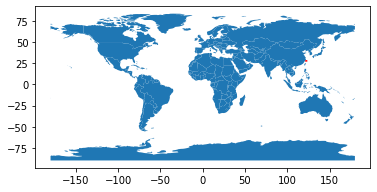

In [4]:
# Check your geojson
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
wbase = world.plot()
api.to_geodataframe(products).plot(ax=wbase, color="red")

In [5]:
# Search results
products_gdf = api.to_geodataframe(products)
products_gdf

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,missiondatatakeid,slicenumber,...,filename,format,productclass,polarisationmode,acquisitiontype,status,size,identifier,uuid,geometry
d1e00cca-dce1-4031-a33e-e3151af2fcff,S1A_IW_SLC__1SDV_20191202T095357_20191202T0954...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-02T09:53:57.117Z, Instrument: SA...",2019-12-02 09:53:57.117,2019-12-02 09:54:26.939,2019-12-02 13:57:04.295,225926,1,...,S1A_IW_SLC__1SDV_20191202T095357_20191202T0954...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.93 GB,S1A_IW_SLC__1SDV_20191202T095357_20191202T0954...,d1e00cca-dce1-4031-a33e-e3151af2fcff,"MULTIPOLYGON (((121.41325 26.64915, 123.92310 ..."


In [6]:
# download single scene by known product id
#api.download(<product_id>, directory_path='.')

# search by polygon, time, and Hub query keywords
footprint = geojson_to_wkt(read_geojson(target_area))
products = api.query(footprint,
                     date = (start,  end),
                    platformname = 'Sentinel-1',
                     producttype='SLC')

# download all results from the search
api.download_all(products, directory_path='./downloads/')

# # GeoJSON FeatureCollection containing footprints and metadata of the scenes
# api.to_geojson(products)

# # GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
# api.to_geodataframe(products)

# # Get basic information about the product: its title, file size, MD5 sum, date, footprint and
# # its download url
# api.get_product_odata(<product_id>)

# # Get the product's full metadata available on the server
# api.get_product_odata(<product_id>, full=True)

Downloading: 100%|██████████| 4.52G/4.52G [3:02:20<00:00, 413kB/s]
MD5 checksumming: 100%|██████████| 4.52G/4.52G [00:11<00:00, 380MB/s]


({'d1e00cca-dce1-4031-a33e-e3151af2fcff': {'id': 'd1e00cca-dce1-4031-a33e-e3151af2fcff',
   'title': 'S1A_IW_SLC__1SDV_20191202T095357_20191202T095426_030168_037286_6208',
   'size': 4522025877,
   'md5': '6D20CAEFA7407F7F57F412D996898E05',
   'date': datetime.datetime(2019, 12, 2, 9, 53, 57, 117000),
   'footprint': 'POLYGON((121.019279 28.447973,123.572891 28.857632,123.923096 27.061853,121.413254 26.649149,121.019279 28.447973))',
   'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d1e00cca-dce1-4031-a33e-e3151af2fcff')/$value",
   'Online': True,
   'Creation Date': datetime.datetime(2019, 12, 2, 13, 57, 9, 228000),
   'Ingestion Date': datetime.datetime(2019, 12, 2, 13, 57, 4, 295000),
   'path': './downloads/S1A_IW_SLC__1SDV_20191202T095357_20191202T095426_030168_037286_6208.zip',
   'downloaded_bytes': 2978522005}},
 {},
 {})